# Izzet Ahmet 2210765003


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from typing import List
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
"""
os.chdir("/content/drive/MyDrive/Colab Notebooks/AIN422")
print(os.listdir())
"""

# There must be medical_heart.csv in current directory

'\nos.chdir("/content/drive/MyDrive/Colab Notebooks/AIN422")\nprint(os.listdir())\n'

In [ ]:
# Need to change this variable according to your dataset
TARGET_COLUMN = "output"
DATA_SET_PATH = "medical_heart.csv"

# 1. Data Preprocessing


## 1.1 Read Data


In [ ]:
# Read data with pandas
df = pd.read_csv(DATA_SET_PATH)

In [ ]:
def analyze_data(df):
    # Write results to see dataset outlines
    print("Columns of Datafrrame : ", df.columns, end="\n\n")
    print("Number of Entries In Dataframe : ", len(df), end="\n\n")
    print("First 5 Entry :\n ", df.head())


analyze_data(df)

Columns of Datafrrame :  Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Number of Entries In Dataframe :  303

First 5 Entry :
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


We have small dataframe which consists from 303 rows and 14 columns


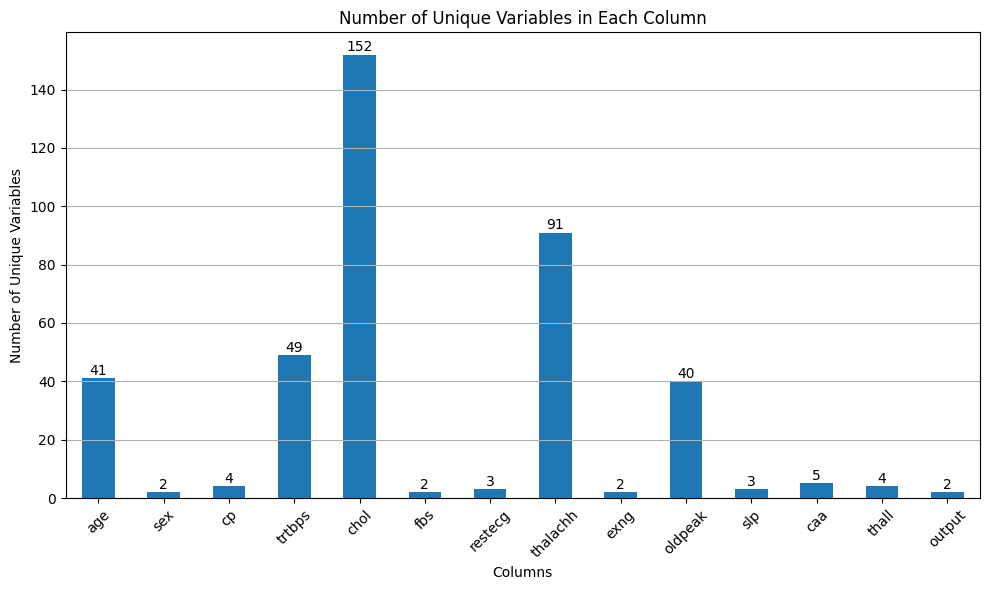

In [ ]:
# It plots bar graph unique variables for each column
def plot_unique_variables():
    # Calculate the number of unique variables for each column
    unique_counts = df.nunique()

    # Plot the results
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.title("Number of Unique Variables in Each Column")
    plt.xlabel("Columns")
    plt.ylabel("Number of Unique Variables")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis="y")  # Add gridlines for y-axis

    # Annotate bars with the number of unique variables
    for i, val in enumerate(unique_counts):
        plt.text(i, val + 0.1, str(val), ha="center", va="bottom")

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


plot_unique_variables()

Note that output column is in binary type. It will be useful for the prediction


## 1.2 Missing Value Handling


In [ ]:
# It returns number of nulls for each column
def check_nulls():
    return df.isna().sum()


print(check_nulls())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


There is no missing value in our dataframe


## 1.3 Show Features Type


In [ ]:
# Returns types of features for each column
def show_feature_types():
    return df.dtypes


print(show_feature_types())

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


All features are in numeric type


## 1.4 Visualize Outliers


In [ ]:
def number_of_outliers():
    # Calculate quartiles
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

    # Count outliers for each column
    outliers_count = outliers.sum()

    return outliers_count


df_outliers = number_of_outliers()

# Print the number of outliers for each column
print("Number of outliers for each column:")

# Sort the Series in descending order
print(df_outliers.sort_values(ascending=False))

Number of outliers for each column:
fbs         45
caa         25
trtbps       9
chol         5
oldpeak      5
thall        2
thalachh     1
age          0
sex          0
cp           0
restecg      0
exng         0
slp          0
output       0
dtype: int64


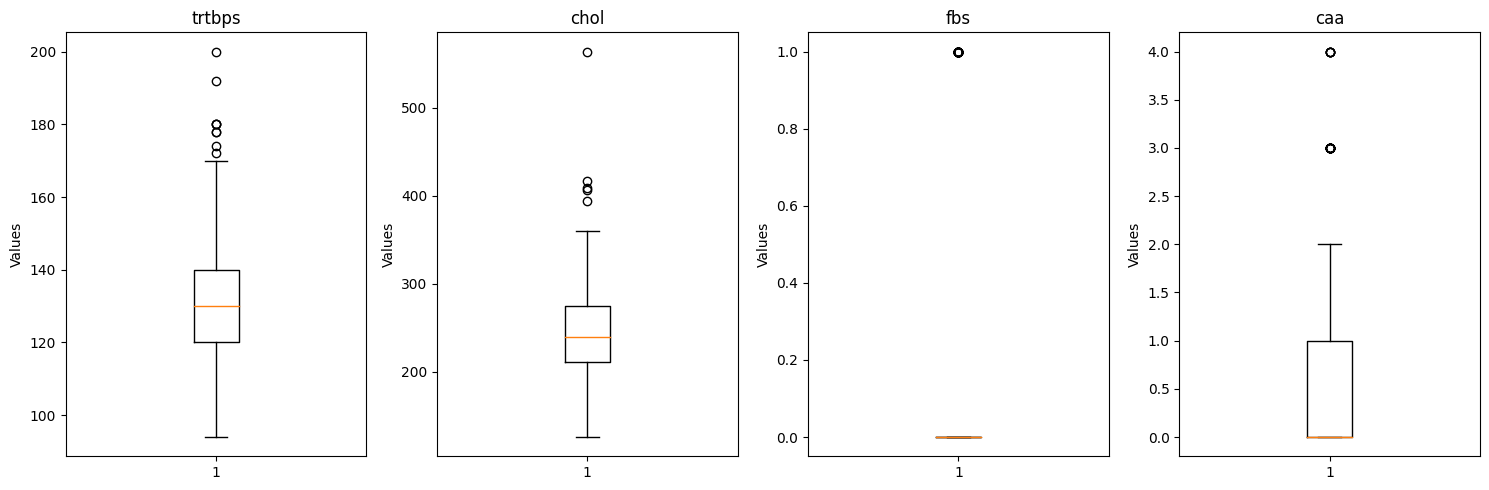

In [ ]:
def box_plot(outliers_column: List[str]):
    # Create subplots for each column
    fig, axes = plt.subplots(nrows=1, ncols=len(outlier_columns), figsize=(15, 5))

    # Plot box plots for each column
    for i, col in enumerate(outlier_columns):
        ax = axes[i]
        ax.boxplot(df[col])
        ax.set_title(col)
        ax.set_ylabel("Values")

    plt.tight_layout()
    plt.show()


outlier_columns = ["trtbps", "chol", "fbs", "caa"]
box_plot(outlier_columns)

As we can see, there is not much outliers in our data. Just fbs and caa columns have the number of outliers to be taken into account


## 1.5 Apply Z-Score Normalization


In [ ]:
# Z-score normalization function
def z_score_normalization(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std


# Apply Z-score normalization column-wise
normalized_df = df.apply(z_score_normalization)

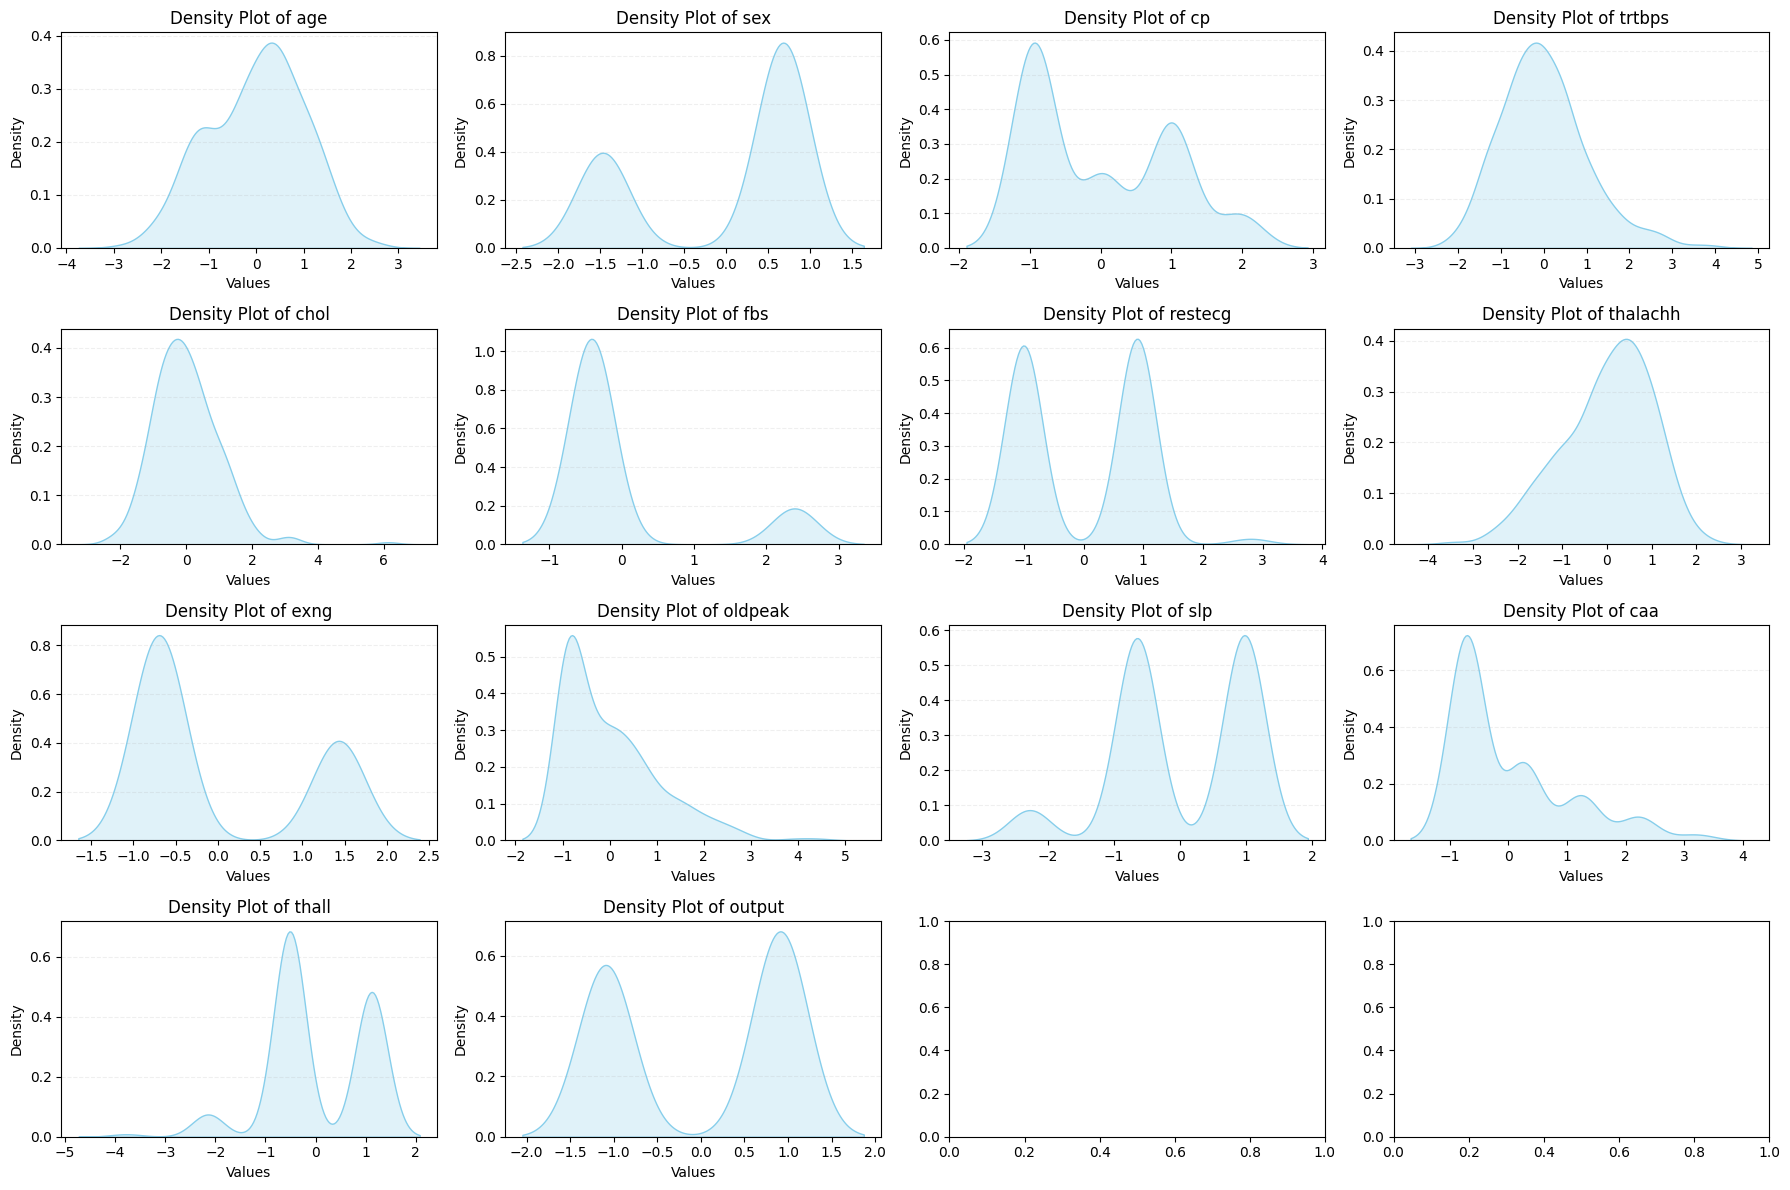

In [ ]:
def plot_distributions(normalized_df: pd.DataFrame):
    # Create a new figure and set the layout to 2 rows and 3 columns
    fig, axes = plt.subplots(4, 4, figsize=(18, 12))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each column and plot the density plot on the corresponding subplot
    for i, column in enumerate(df.columns):
        sns.kdeplot(normalized_df[column], color="skyblue", fill=True, ax=axes[i])
        axes[i].set_title(f"Density Plot of {column}")
        axes[i].set_xlabel("Values")
        axes[i].set_ylabel("Density")
        axes[i].grid(axis="y", linestyle="--", alpha=0.2)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


plot_distributions(normalized_df)

Z Score Normalization applied features


## 1.6 Feature Selection


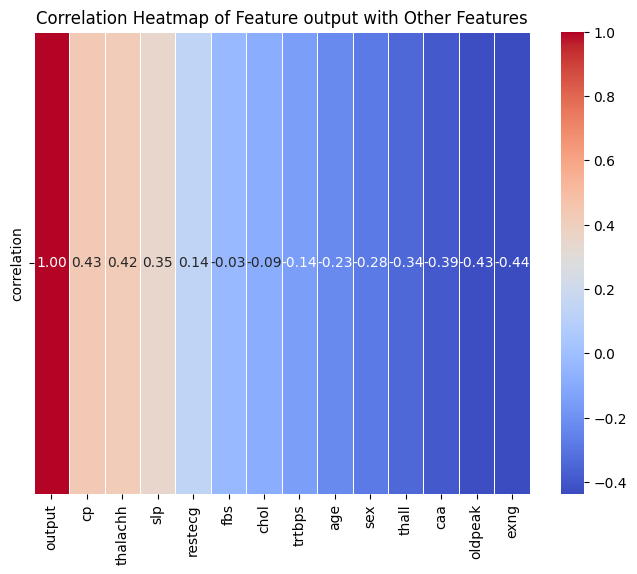

In [ ]:
def correlation_heat_map(column: str):
    # Calculate the correlation matrix for the feature of interest
    correlation_with_feature = df.corrwith(df[column])

    # Create a DataFrame from the correlation values
    correlation_df = pd.DataFrame(correlation_with_feature, columns=["correlation"])

    # Sort the correlation DataFrame by correlation values
    correlation_df_sorted = correlation_df.sort_values(
        by="correlation", ascending=False
    )

    # Plot the correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlation_df_sorted.transpose(),
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
    )
    plt.title(
        f"Correlation Heatmap of Feature {column} with Other Features".format(column)
    )
    plt.show()


correlation_heat_map(TARGET_COLUMN)

In [ ]:
def extract_features(target_column: str):
    threshold = 0.3
    correlations = df.corr()[target_column]
    correlated_columns = correlations[
        (correlations > -threshold) & (correlations < threshold)
    ].index.tolist()
    print(correlated_columns)

    correlated_columns.append(target_column)
    correlated_df = df[correlated_columns]
    return correlated_df


correlated_df = extract_features(TARGET_COLUMN)

['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg']


You may suppose that selecting highly correlated features would lead to better classification. However, in the results, it actually worsened the metric outcomes. So we will continue with all features


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=[TARGET_COLUMN])  # Drop the 'target column' to get features
y = df[TARGET_COLUMN]

## 1.7 PCA


In [ ]:
def apply_pca(features):
    # Step 1: Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # Step 2: Apply PCA
    pca = PCA(n_components=2)  # Specify the number of principal components
    X_pca = pca.fit_transform(X_scaled)

    # Create a DataFrame from the reduced data for visualization or further analysis
    X = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])

    # Optional: Print explained variance ratio
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)

    return X


X = apply_pca(X)

Explained Variance Ratio: [0.21254053 0.11820708]


In [ ]:
print(X.head())

        PC1       PC2
0  0.624111  2.321270
1 -0.455988 -0.957351
2 -1.828805  0.042885
3 -1.716006 -0.495337
4 -0.371356  0.301156


# 2. Splitting the Data


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Validation

It is not a reasonable action to split the data into train, test, and validation sets because we already have a small dataset, and making the training dataset smaller is not a good approach for model training.


In [ ]:
def print_shapes():
    # Print the shapes of the resulting datasets
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)


print_shapes()

X_train shape: (242, 2)
y_train shape: (242,)
X_test shape: (61, 2)
y_test shape: (61,)


Split data as 0.8 train and 0.2 test with random_state = 42 as requested in assignment pdf


# 4. Choosing a Model


To choose best model for this data lets describe what our dataset is:

Out dataset is a small, numeric and high dimensional dataset. For categorical variable estimation we can use SVM, KNN, Random Forest, Neural Network, Boosting Algorithms. Lets use all and compare metric results


In [ ]:
def train_models_with_cv():
    # Initialize models
    svm_model = SVC()
    knn_model = KNeighborsClassifier()
    rf_model = RandomForestClassifier()
    nn_model = MLPClassifier()
    xgb_model = xgb.XGBClassifier()

    models = {
        "SVM": svm_model,
        "KNN": knn_model,
        "RF": rf_model,
        "NN": nn_model,
        "XGB": xgb_model,
    }
    scores = {}

    # Perform cross-validation and store F1 scores for each model
    for name, model in models.items():
        # Define the cross-validation method (e.g., 5-fold cross-validation)
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores[name] = cross_val_score(model, X, y, cv=kf, scoring="f1").mean()

    return scores

# 5. Performance Evaluation


In [ ]:
def plot_f1_scores(y_preds, y_test):
    # Plot F1 scores
    plt.figure(figsize=(8, 6))
    plt.xlabel("Models")
    plt.ylabel("F1 Score")
    plt.title("F1 Scores for Multiple Prediction Sets")
    plt.xticks(
        range(len(y_preds.values())),
        [f"{list(y_preds.keys())[i]}" for i in range(len(y_preds.values()))],
    )

    # Annotate each bar with its F1 score
    for i, f1 in enumerate(y_preds.values()):
        plt.text(i, f1, f"{f1:.3f}", ha="center", va="bottom")

    plt.show()

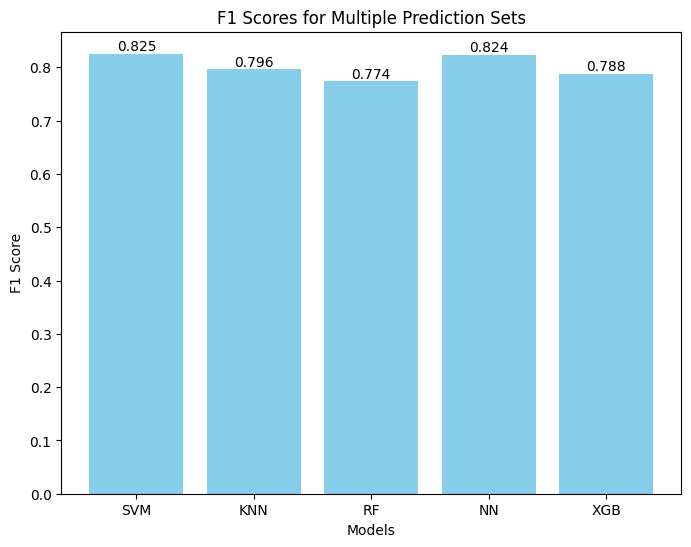

{'SVM': 0.8254382805818551, 'KNN': 0.796143147416564, 'RF': 0.7739018137035379, 'NN': 0.8237981776288228, 'XGB': 0.7878639234172022}


In [ ]:
scores = train_models_with_cv()
plot_f1_scores(scores, y_test)
print(scores)

# 6. Hyperparameter Tuning


In [ ]:
# Define the SVM classifier
svm = SVC()

# Define the grid of hyperparameters to search
param_grid = {
    "C": [0.1, 1, 10, 100],  # Regularization parameter
    "gamma": [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    "kernel": ["linear", "rbf", "poly"],  # Kernel type
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="f1")
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_pred, average="weighted")
print("Test F1 Score:", test_f1_score)

Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Test F1 Score: 0.8522997278821265


# 7. Results


You may wonder why SVM and NN get best results and others didn’t. Here are why SVM get better results:
Effective in high-dimensional spaces: We applied PCA on dataset. With PCA reducing the dimensionality to two components, SVM may still effectively capture the decision boundary in the transformed feature space.
Kernel trick: SVM's ability to use different kernel functions might have helped in capturing nonlinear relationships in this data.
Robustness to outliers: SVM is generally less affected by outliers, which could be advantageous in small datasets where outliers may have a larger impact. In this dataset, there is lot of outliers in two features and SVM perform good job on these features
Global optimization: SVM aims to maximize the margin, which could lead to better generalization performance in this dataset.
Small dataset: SVM is known to perform well with small to medium-sized datasets, especially when the number of features is not excessively large. In this dataset (303x14) it might be another reason for SVM performance

Why NN get better results:
Architecture of NN: Neural networks typically require large amounts of data to effectively learn complex patterns, which might not be fully utilized with a small dataset. But it can overfit or recognize patterns between features. NN might caught a good pattern and obtain better results.

Why RF and XGB couldn’t get good results:
Complexity: These algorithms are inherently more complex and might require more data to effectively capture the underlying patterns. It couldn’t get patterns with 303 entries.
Dimensionality reduction: PCA may not have preserved enough information to benefit ensemble methods effectively.

And finally, why KNN couldn’t get good results:
Curse of dimensionality: With only two principal components from PCA, KNN may struggle to effectively measure distances and identify nearest neighbors, leading to poor performance.
Sensitive to outliers: KNN's performance can degrade significantly in the presence of outliers, which might not be well-handled with a small dataset.
Local decision-making: KNN's decision-making process is based on local neighborhoods, which might not be ideal for datasets with limited samples.
